### Recordatorio:
- Debes ejecutar la siguiente celda para poder jugar con lo que tenemos preparado
- Para ejecutar una celda la tienes que seleccionar y pulsar: Ctrl + Enter (Shift + Enter también vale)
- Cuando la hayas ejecutado, para iniciar el modo presentación teclea: alt + R
- Con las teclas de AvPág y RePág, adelantas o retrocedes en la presentación
- En Chrome puedes habilitar el modo a pantalla completa con: F11
- Para salir del modo presentación vuelve a teclear: alt + R

In [1]:
#@title Módulos (o librerías, o paquetes) que hay que cargar previamente
# Si no ejecutas esta celda no vas a poder interactuar con las celdas que vendrán a continuación
from IPython.display import IFrame
from IPython.display import Image
from IPython.display import Audio
from IPython.display import YouTubeVideo
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:85% !important; }</style>"))
js = "<script>hoy = new Date();var eta_ms = new Date(hoy.getFullYear(), hoy.getMonth(), hoy.getDate(), 19, 13).getTime() - Date.now();var timeout = setTimeout(function(){alert('Héctor, quizá podrías dejar tranquilita ya a la gente, ¿no? Gracias :)');}, eta_ms);</script>"
display(HTML(js))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
import matplotlib.mlab as ml
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from ipywidgets import interactive
import scipy.io.wavfile as wavfile # sirve para leer ficheros WAV: https://docs.scipy.org/doc/scipy/reference/tutorial/io.html#module-scipy.io.wavfile
import scipy.signal as sig # hilbert, espectrograma, chirp
import pywt # sirve para la transformada de wavelet: pip install PyWavelets
import pandas as pd
import urllib.request
import warnings
warnings.filterwarnings('ignore')
class displayhoriz(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">{1}</div>"""
    def __init__(self, *args):
        self.args = args
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) for a in self.args)
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)

# Tema 3.- Medidas acústicas
* Campos sonoros
* Instrumentación acústica
* Muestreo
* La intensidad acústica y su medida
* Estimación de la potencia acústica
* Identificación y separación de fuentes    

## Objetivos
* Comprender la complejidad de la medida de magnitudes acústicas asociadas a una fuente: influencia del entorno (campo sonoro)
* Conocer las características de los micrófonos de condensador para la medida de la presión acústica
* Comprender qué es muestrear y el fenómeno de *aliasing*
* Conocer las características de las sondas de intensidad para la medida de la intensidad acústica
* Conocer las aplicaciones de la sonda de intensidad para:
  * Estimar la potencia acústica de una fuente
  * Identificar y encontrar fuentes

## Campos sonoros
Necesidad de medir:
* Presión sonora
* Intensidad acústica
* Potencia acústica

Tipos de medida:
* Medidas globales: homologación, normativas, etc.
* Medidas en detalle (separación de fuentes):
  * Para el conocimiento de una fuente
  * Para desarrollo y optimización

Problema fundamental:
* Influencia del entorno sobre los resultados de la medida
* Influencia del campo sonoro



### Campo libre

* Ausencia de reflexiones

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/CampoLibre.jpg" style="width:40%;padding:2%;">


### Campo difuso

* Campo uniforme
* Todas las direcciones de propagación son igualmente probables

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/CampoDifuso.jpg" style="width:40%;padding:2%;">

### Campo reverberante

* Múltiples reflexiones
* Aproximación a campo difuso



### Campos próximo y lejano

**Campo próximo**
* Distancias menores que $2 \lambda$
* No toda la energía se radia

**Campo lejano:**
* Disminución con el cuadrado de la distancia: $I=p^2 / \left( \rho c \right)$
* Presión y velocidad de la partícula en fase

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/CampoProximoLejano.jpg" style="float:center;width:60%;padding:1%;">


## Instrumentación acústica

### Micrófonos de condensador

* Rangos de medida:

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/ByK-RangoMedida.jpg" style="float:center;width:60%;padding:1%;">


### Micrófonos de condensador

* Rango de frecuencias y sensibilidad (mV/Pa)

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/ByK-RangoFrecuencias.jpg" style="float:center;width:60%;padding:1%;">


* Rango dinámico: es la relación entre los niveles más alto y más bajo que un micrófono puede medir

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/ByK-RangoDinamico.jpg" style="float:center;width:60%;padding:1%;">


* Gráficos de calibración:

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/ByK-Calibracion.jpg" style="float:center;width:60%;padding:1%;">


* Equipos de calibración:

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/ByK-Pistofono.jpg" style="float:center;width:60%;padding:1%;">


* Efectos de las ponderaciones en la calibración:

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/ByK-CalibracionPonderacion.jpg" style="float:center;width:60%;padding:1%;">


## Muestreo

Proceso por el cual convertimos una señal analógica en una señal digital

$x(n)$ es la señal en tiempo discreto obtenida tomando muestras de la señal analógica $x_a(t)$ cada $T$ segundos.

$$ x(n) = x_a(n \cdot T) \; ; \, n=0, 1,\dots,N $$

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/DescripcionMuestreo.jpg" style="float:center;width:50%;padding:2%;">

* El intervalo de tiempo $T$ se denomina intervalo de muestreo
* Su inversa $1/T$ se denomina frecuencia de muestreo $f_s$



### Teorema del <a href="https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem">muestreo</a>

Proporciona un criterio para la elección de la frecuencia de muestreo:

$$ f_s \gt 2f_{max} $$

donde $f_{max}$ es la máxima frecuencia (que se pretende observar) de la señal muestreada.

* En la práctica: $f_s \gt 2.56 f_{max}$ (criterio de Nyquist)
* Consecuencia de una mala elección: fenómeno de *aliasing*

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/Aliasing.jpg" style="float:center;width:70%;padding:2%;">


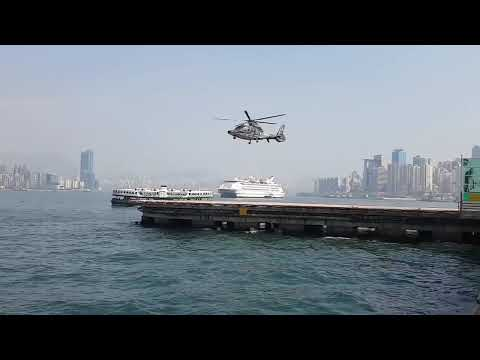

In [2]:
# Esta celda incorpora un video de Youtube al notebook. Mola, ¿eh?
vid = YouTubeVideo("yr3ngmRuGUc")
display(vid)

## La intensidad acústica y su medida

Una sonda para la medida de la intensidad acústica consta de dos micrófonos separados por un espaciador de tamaño conocido.

**Medida de la intensidad**
* Formulación en dominio tiempo
  * Recordando a Euler:
$$ u = - \frac{1}{\rho} \int \frac{\partial p}{\partial r} \mathrm{d}t $$
  * Aproximando en diferencias finitas:
$$ u = - \frac{1}{\rho} \int \frac{p_B - p_A}{\Delta r} \mathrm{d}t $$
  * Y de la definición de intensidad acústica:
$$ I = p \, u = - \frac{p_A+p_B}{2 \rho \Delta r} \int \left( p_B - p_A \right) \mathrm{d}t $$

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/Intensidad-Principio.jpg" style="float:right;width:45%;padding:1%;"/>
<ul style="float:left;width:45%">


### Sondas: Directividad

**Intensidad**

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/Intensidad-Directividad01.jpg" style="float:center;width:50%;padding:2%;">


* Influencia en el nivel de intensidad
* Desviación en la medida en función del ángulo entre la sonda y la fuente:

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/Intensidad-Directividad02.jpg" style="float:center;width:50%;padding:2%;">


### Limitaciones: Límite de alta frecuencia

* Introducido por la aproximación a las diferencias finitas
* Puede resolverse reduciendo el tamaño del espaciador

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/Intensidad-Limitaciones01.jpg" style="float:center;width:50%;padding:2%;">


### Limitaciones: Límite de baja frecuencia

* Introducido por diferencias de fase entre los micrófonos y el cableado
* Puede resolverse aumentando el tamaño del espaciador

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/Intensidad-Limitaciones02.jpg" style="float:center;width:50%;padding:2%;">


### Limitaciones: Reactividad del campo

* Indice de reactividad del campo: diferencia entre el nivel de intensidad sonora y el nivel de presión acústica
* Debe mantenerse una correcta orientación de la sonda de intensidad

$$ L_P - L_I = 10 \, \mathrm{log} \left[ \frac{\lambda \varphi}{\Delta r \pi} \right] $$

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/Intensidad-Limitaciones03.jpg" style="float:right;width:45%;padding:1%;"/>


### Estimación de la potencia acústica
Las ventajas del uso de la intensidad acústica para la determinación de la potencia acústica son:
* No es necesario trasladar la máquina (a una cámara anecoica, reberverante,...)
* Puede utilizarse el método en presencia de otras fuentes

Definición de superficies y efecto del ruido de fondo

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/PotenciaFuenteCerrada.jpg" style="float:left;width:50%;padding:2%;">
<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/PotenciaFuenteNoCerrada.jpg" style="float:right;width:50%;padding:2%;">


### Identificación y separación de fuentes

Localización de fuentes: Método de búsqueda del cero
* Válido cuando hay una fuente dominante
* Cuando la fuente se encuentra perpendicular a la sonda, los dos micrófonos registran las ondas sin desfase

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/BusquedaFuente.jpg" style="float:center;width:50%;padding:2%;">


**Aplicación: Separación de fuentes**

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/SeparacionFuentes.jpg" style="float:center;width:50%;padding:2%;">


**Aplicación: Diagnóstico de una locomotora**

Identificación de fuentes:
* Mapeado de la intensidad sonora del ruido externo
* Malla 1m x 1m
* Altura mínima: por encima bogies (fuentes menos intensas)
* Altura máxima: por encima de la salida del escape
* Distancia sonda-máquina: la mínima a la que $u_{flujo} \lt 3 m/s$

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/DiagnosticoLocomotora01.jpg" style="float:center;width:70%;padding:2%;">


Condiciones de medida:
* Medidas realizadas en vías
* Motor sin carga y en Th8 (900 rpm)
* Ventiladores de refrigeración: Full y Off

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/DiagnosticoLocomotora02.jpg" style="float:center;width:50%;padding:2%;">


Mapa de intensidad: ventiladores off

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/DiagnosticoLocomotora03.jpg" style="float:center;width:70%;padding:2%;">


Mapa de intensidad: ventiladores full

<img src="https://hcliment.webs.upv.es/docencia/dar/figs/tema03/DiagnosticoLocomotora04.jpg" style="float:center;width:70%;padding:2%;">


## Ejercicios
Resuelve los siguientes ejercicios en las celdas habilitadas para ello.

Instrucciones:

Puede haber 3 tipos de celdas:
- Ya completadas: no tienes que escribir nada. Son celdas que ya tienen la solución a lo que se pregunta pero puede ser interesante ver lo que hay escrito por si te sirve para completar celdas siguientes.
- Parcialmente completadas: tienes que quitar los símbolos de comentario (#) para habilitar el código y reemplazar RELLENA-AQUI con lo que consideres oportuno.
- Vacías: tienes que escribir tú todo el código. Muchas veces se puede hacer usando de forma inteligente "copiar-pegar" de celdas anteriores o de código de celdas vistas en el tema de teoría.

### Ejercicio 3.1

Con el fin de comprender el efecto de aliasing, trata de obtener la figura que se ha visto en clase con ayuda del código siguiente.


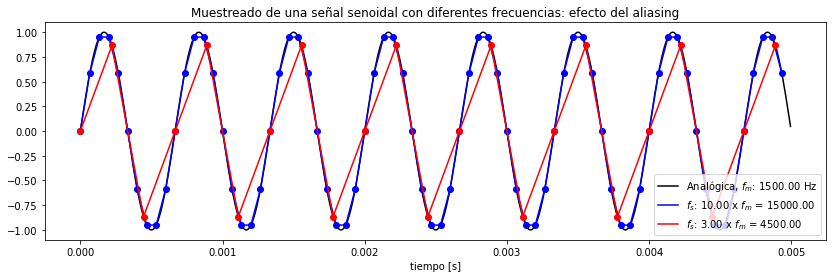

In [3]:
# Esta celda muestra el efecto del aliasing
# Cambia los valores de las frecuencias de muestreo modificando los multiplicadores kmuestreo1 y kmuestreo2
fa = 200000 # Hz; una frecuencia de muestreo muy grande, para que parezca que es una señal analógica
ta = np.arange(0, 0.005, 1/fa)
fmaquina = 1500 # Hz; es la frecuencia de nuestra señal, nada que ver con las frecuencias de muestreo
xa = np.sin(2*np.pi*fmaquina*ta)
kmuestreo1 = 10 # CAMBIA AQUI
kmuestreo2 = 3 # CAMBIA AQUI
fs1 = kmuestreo1 * fmaquina # Hz, muestreo 1
t1 = np.arange(0, 0.005, 1/fs1)
x1 = np.sin(2*np.pi*fmaquina*t1)
fs2 = kmuestreo2 * fmaquina # Hz, muestreo 2
t2 = np.arange(0, 0.005, 1/fs2)
x2 = np.sin(2*np.pi*fmaquina*t2)
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(ta,xa,'k', label = "Analógica, $f_m$: {0:.2f} Hz".format(fmaquina))
ax.plot(t1,x1,'b', label = "$f_s$: {0:.2f} x $f_m$ = {1:.2f}".format(kmuestreo1,fs1))
ax.plot(t1,x1,'bo')
ax.plot(t2,x2,'r', label = "$f_s$: {0:.2f} x $f_m$ = {1:.2f}".format(kmuestreo2,fs2))
ax.plot(t2,x2,'ro')
ax.set_title('Muestreado de una señal senoidal con diferentes frecuencias: efecto del aliasing')
ax.set_xlabel('tiempo [s]')
ax.legend(loc='lower right');


### Ejercicio 3.2
Se trata de obtener la señal acústica originada por un conjunto de armónicos con las siguientes características:
* Debe tener una duración de 4 segundos y estar muestreada con $f_s$ = 44000 Hz.
* La frecuencia principal $f_1$ será de 250 Hz y amplitud = 1

Se pide:
1. Obtener el audio producido por un seno a $f_1$
1. Obtener el audio de dos senos simultáneos a $f_1$ y $2 \, f_1$; ambos de igual amplitud
1. Obtener el audio de tres senos simultáneos a $f_1$, $2 \, f_1$ y $3 \, f_1$; todos ellos de igual amplitud


In [4]:
# Escribe en esta celda la solución

### Ejercicio 3.3
Se trata de obtener la señal acústica originada por un conjunto de armónicos con las siguientes características:
* Debe tener una duración de 4 segundos y estar muestreada con $f_s$ = 44000 Hz.
* La frecuencia principal $f_1$ será de 250 Hz y amplitud = 1

Se pide:
1. Obtener el audio producido por tres senos simultáneos a $f_1$, $2 \, f_1$ y $3 \, f_1$, modificando alternativamente la amplitud en cada uno de ellos: [1, 0.5, 0.5], [0.5, 1, 0.5] y [0.5, 0.5, 1]

In [5]:
# Escribe en esta celda la solución

### Ejercicio 3.4
Se trata de obtener la señal acústica con las siguientes características:
* Debe tener una duración de 10 segundos y estar muestreada con $f_s$ = 44000 Hz
* La frecuencia principal $f_0$ será de 440 Hz
* La amplitud de esta señal, $A_0$, no será constante con el tiempo sino que obedecerá a una señal senoidal de amplitud $A_1$ = 1 y frecuencia $f_1$ = 2 Hz

Se pide:
1. Obtener el audio producido por esta señal
1. Representar la señal en función del tiempo

In [6]:
# Escribe en esta celda la solución

<h2>¿Qué debes haber aprendido al hacer los ejercicios?</h2>
<ul>
    <li>A comprender la importancia de la selección de la frecuencia de muestreo para evitar el fenómeno de aliasing.</li>
    <li>A comprender la relación entre la presencia de armónicos y el comportamiento temporal de la señal.</li>
</ul>

## Fin del tema

## Solucionario

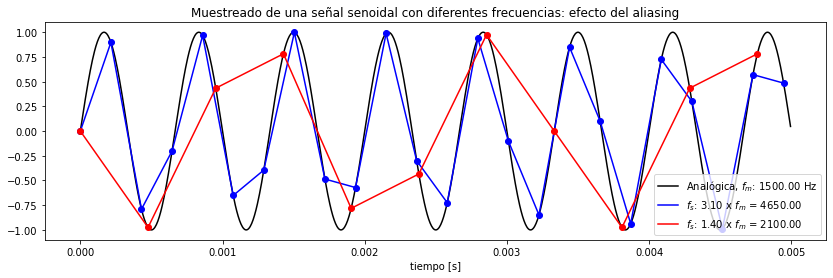

In [7]:
# Ejercicio 3.1
# Esta celda muestra el efecto del aliasing
# Cambia los valores de las frecuencias de muestreo modificando los multiplicadores kmuestreo1 y kmuestreo2
fa = 200000 # Hz; una frecuencia de muestreo muy grande, para que parezca que es una señal analógica
ta = np.arange(0, 0.005, 1/fa)
fmaquina = 1500 # Hz; es la frecuencia de nuestra señal, nada que ver con las frecuencias de muestreo
xa = np.sin(2*np.pi*fmaquina*ta)
kmuestreo1 = 3.1 # CAMBIA AQUI
kmuestreo2 = 1.4 # CAMBIA AQUI
fs1 = kmuestreo1 * fmaquina # Hz, muestreo 1
t1 = np.arange(0, 0.005, 1/fs1)
x1 = np.sin(2*np.pi*fmaquina*t1)
fs2 = kmuestreo2 * fmaquina # Hz, muestreo 2
t2 = np.arange(0, 0.005, 1/fs2)
x2 = np.sin(2*np.pi*fmaquina*t2)
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(ta,xa,'k', label = "Analógica, $f_m$: {0:.2f} Hz".format(fmaquina))
ax.plot(t1,x1,'b', label = "$f_s$: {0:.2f} x $f_m$ = {1:.2f}".format(kmuestreo1,fs1))
ax.plot(t1,x1,'bo')
ax.plot(t2,x2,'r', label = "$f_s$: {0:.2f} x $f_m$ = {1:.2f}".format(kmuestreo2,fs2))
ax.plot(t2,x2,'ro')
ax.set_title('Muestreado de una señal senoidal con diferentes frecuencias: efecto del aliasing')
ax.set_xlabel('tiempo [s]')
ax.legend(loc='lower right');

In [8]:
# Ejercicio 3.2
f1 = 250 # Hz frecuencia de la onda
A = 1 # amplitud de la onda
tmax = 4 # s duración de la onda
fs = 44000 # Hz sampling frequency, frecuencia de muestreo
npuntos = int(fs * tmax) # [-] número de puntos de mi señal
t = np.linspace(0, tmax, npuntos) # vector de tiempos
signal1 = A * np.sin(2 * np.pi * f1 * t)
signal2 = A * np.sin(2 * np.pi * f1 * t) + A * np.sin(2 * np.pi * 2*f1 * t)
signal3 = A * np.sin(2 * np.pi * f1 * t) + A * np.sin(2 * np.pi * 2*f1 * t) + A * np.sin(2 * np.pi * 3*f1 * t)
displayhoriz('Audio(signal1, rate=fs)', 'Audio(signal2, rate=fs)', 'Audio(signal3, rate=fs)')

Audio(signal1, rate=fs)
<IPython.lib.display.Audio object>

Audio(signal2, rate=fs)
<IPython.lib.display.Audio object>

Audio(signal3, rate=fs)
<IPython.lib.display.Audio object>

In [9]:
# Ejercicio 3.3
f1 = 250 # Hz frecuencia de la onda
A = 1 # amplitud de la onda
tmax = 4 # s duración de la onda
fs = 44000 # Hz sampling frequency, frecuencia de muestreo
npuntos = int(fs * tmax) # [-] número de puntos de mi señal
t = np.linspace(0, tmax, npuntos) # vector de tiempos
signal1 = A * np.sin(2 * np.pi * f1 * t) + A/2 * np.sin(2 * np.pi * 2*f1 * t) + A/2 * np.sin(2 * np.pi * 3*f1 * t)
signal2 = A/2 * np.sin(2 * np.pi * f1 * t) + A * np.sin(2 * np.pi * 2*f1 * t) + A/2 * np.sin(2 * np.pi * 3*f1 * t)
signal3 = A/2 * np.sin(2 * np.pi * f1 * t) + A/2 * np.sin(2 * np.pi * 2*f1 * t) + A * np.sin(2 * np.pi * 3*f1 * t)
displayhoriz('Audio(signal1, rate=fs)', 'Audio(signal2, rate=fs)', 'Audio(signal3, rate=fs)')

Audio(signal1, rate=fs)
<IPython.lib.display.Audio object>

Audio(signal2, rate=fs)
<IPython.lib.display.Audio object>

Audio(signal3, rate=fs)
<IPython.lib.display.Audio object>

(0.0, 4.0)

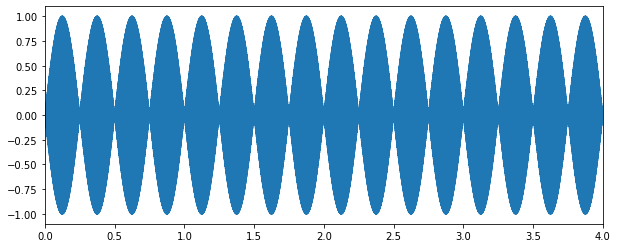

In [10]:
# Ejercicio 3.4
f0 = 440 # Hz frecuencia de la onda
A1 = 1
f1 = 2 # Hz
fs = 44000 # Hz sampling frequency, frecuencia de muestreo
tmax = 10 # s duración de la onda
npuntos = int(fs * tmax) # [-] número de puntos de mi señal
t = np.linspace(0, tmax, npuntos) # vector de tiempos
# Oh! Tenemos una amplitud variable con el tiempo!
A0 = A1 * np.sin(2 * np.pi * f1 * t) # amplitud de la onda
y0 = A0 * np.sin(2 * np.pi * f0 * t)
Audio(y0, rate=fs)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(t,y0,label='señal con amplitud modulada')
ax1.set_xlim([0,4])